# E2a: Küchentischversuch zum Laval-Rotor

Name:  
Datum:  

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:
Lassen sich für Haushaltsgeräte eindeutige Eigenfrequenzen ermitteln. 

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="figures/IMG_9975.jpg" width="500">

- Beschreibung des Aufbaus:
Der beschleunigungssensor wird mit Klebeband an dem Smartphone befestigt. Das Smartphone liegt auf eier glatten Holzoberfläche, sodass die Vibration so wenig wie möglich beeinträchtigt wird.
- Vorgangsbeschreibung:
Auf dem smartphone wird ein Timer gestellt. Sobald dieser abgelaufen ist, wird die Vibration des Gerätes gemessen.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "/home/jovyan/work/lavalrotor_home_experiment/measurement_data/data_20240103_125635_NoahWaltmann_smartphone" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240103_125635_NoahWaltmann_smartphone.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "/home/jovyan/work/lavalrotor_home_experiment/measurement_data/data_20240103_125635_NoahWaltmann_smartphone/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "/home/jovyan/work/lavalrotor_home_experiment/measurement_data/data_20240103_125635_NoahWaltmann_smartphone/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "/home/jovyan/work/lavalrotor_home_experiment/measurement_data/data_20240103_125635_NoahWaltmann_smartphone/1ee847be-fddd-6ee4-892a-68c4555b0981.js

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
with h5py.File(f'{path_measurement_folder}/{h5_file_name}', 'r') as f:
    acc_x = np.array(f["RawData"]["acceleration_x"])
    acc_y = np.array(f["RawData"]["acceleration_y"])
    acc_z = np.array(f["RawData"]["acceleration_z"])
    time = np.array(f["RawData"]["timestamp"])

#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:
acc_mean = get_vec_accel(x=acc_x,y=acc_y,z=acc_z)
print(acc_mean)

[10.17444545 10.17444545 10.20811502 ... 10.02160943 10.02160943
 10.02160943]


In [6]:
time_gap=np.zeros(len(time)-1)
for i in range(len(time)-1):
    time_gap[i]=time[i+1]-time[i]
print(time_gap)

[0.00234079 0.00227165 0.00233293 ... 0.00201726 0.00201869 0.00201702]


#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

Text(0.5, 1.0, 'Time between measurements')

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


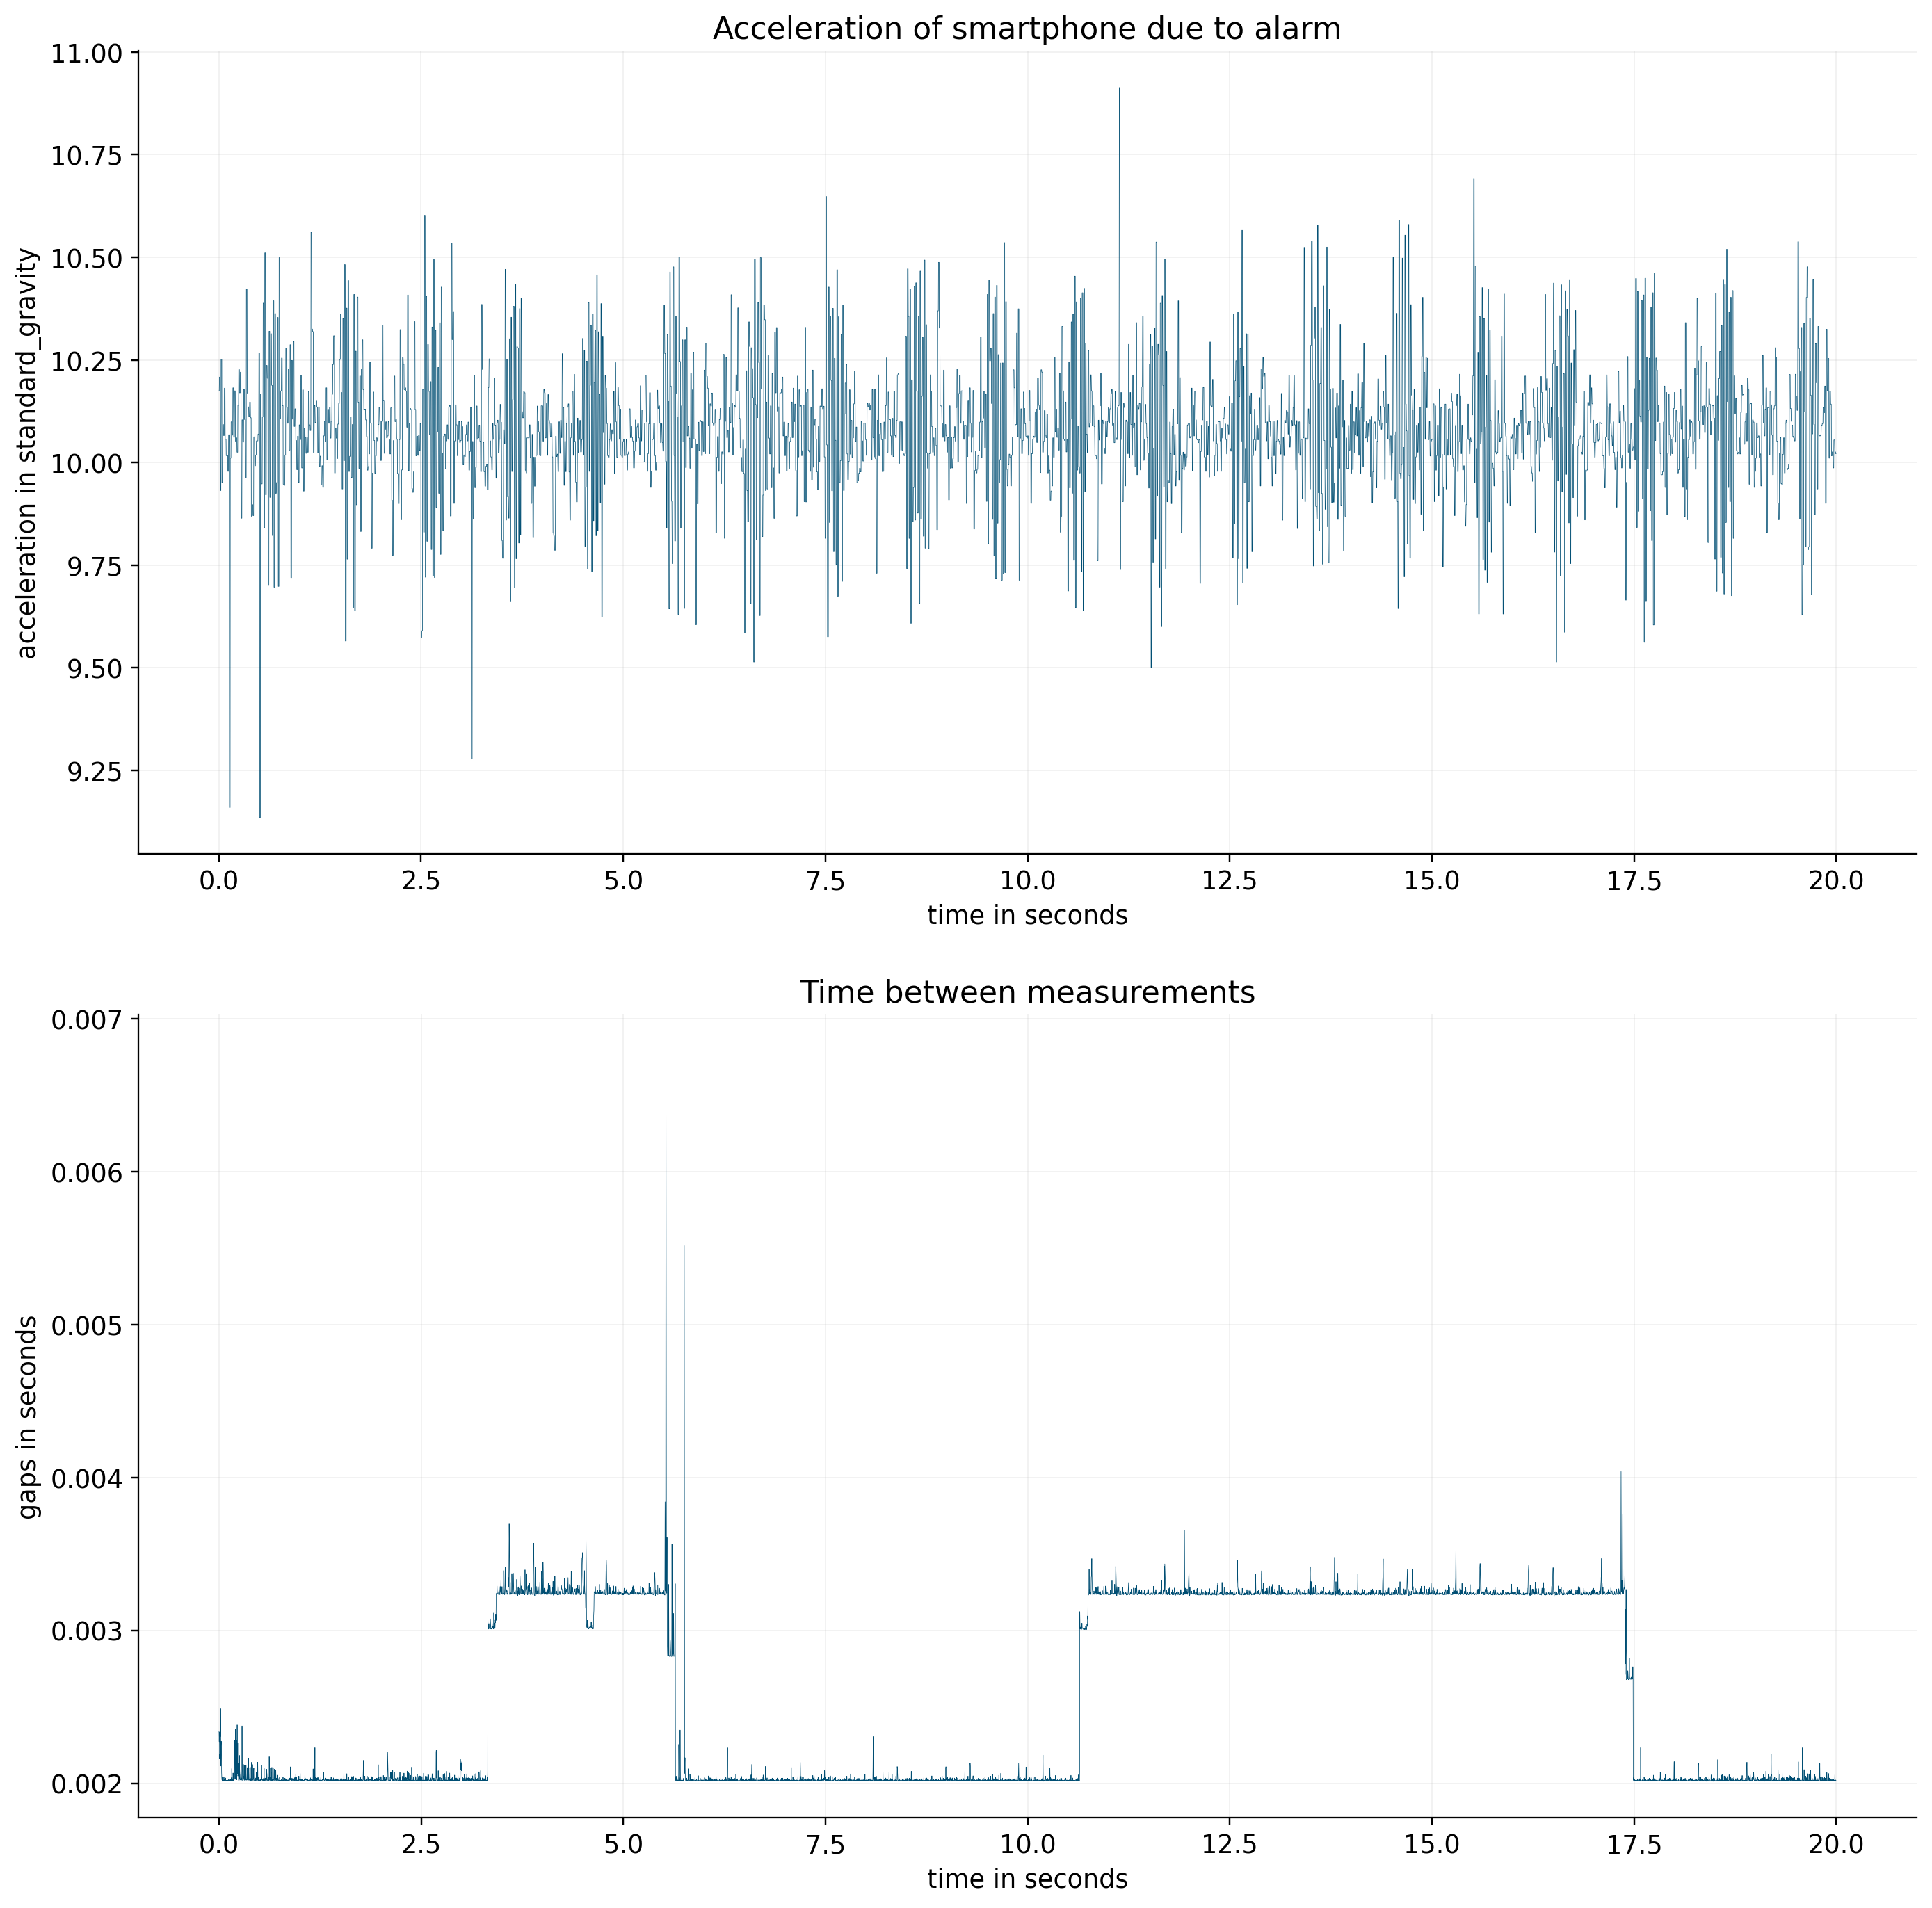

In [7]:
fig,axs = plt.subplots(2,figsize=(15, 15))
axs[0].plot(time,acc_mean,linewidth=0.25)
axs[0].grid(True,linewidth=0.1)
axs[0].set_xlabel("time in seconds")
axs[0].set_ylabel("acceleration in standard_gravity")
axs[0].set_title("Acceleration of smartphone due to alarm")

axs[1].plot(time[:-1],time_gap,linewidth=0.25)
axs[1].grid(True,linewidth=0.1)
axs[1].set_xlabel("time in seconds")
axs[1].set_ylabel("gaps in seconds")
axs[1].set_title("Time between measurements")

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [8]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
(interp_data,interp_time) = interpolation(time,acc_mean)

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

In [9]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
(ampl,freq) = my_fft(interp_data,interp_time)
plt.plot(freq, ampl)
plt.xlabel("frequencies")
plt.ylabel("relative amplitude")

NameError: name 'fft_result' is not defined

In [ ]:
#sp = np.fft.fft(np.sin(interp_time))
#freq = np.fft.fftfreq(interp_time.shape[-1])
#plt.plot(freq, sp.real, freq, sp.imag)

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="figures/IMG_5831.jpg" width="500">

- Beschreibung des Aufbaus:
Der beschleunigungssensor wird mit Klebeband an dem Handmixer befestigt. Die Rührstäbe des Mixers sind nicht montiert.
- Vorgangsbeschreibung:
Der Mixer wird auf Stufe 1 gestellt und hochkant aufgestellt. Mittels Beschleunigungssensor wird über 20 Sekunden die Vibration gemessen.

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [ ]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "/home/jovyan/work/lavalrotor_home_experiment/measurement_data/data_20240105_083825_NoahWaltmann_blender_02" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240105_083825_NoahWaltmann_blender.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end


In [ ]:

"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [ ]:
with h5py.File(f'{path_measurement_folder}/{h5_file_name}', 'r') as f:
    acc_x = np.array(f["RawData"]["acceleration_x"])
    acc_y = np.array(f["RawData"]["acceleration_y"])
    acc_z = np.array(f["RawData"]["acceleration_z"])
    time = np.array(f["RawData"]["timestamp"])

#### 2. Betrag der Beschleunigung berechnen


In [ ]:
acc_mean = get_vec_accel(x=acc_x,y=acc_y,z=acc_z)
print(acc_mean)

In [ ]:
time_gap=np.zeros(len(time)-1)
for i in range(len(time)-1):
    time_gap[i]=time[i+1]-time[i]
print(time_gap)

#### 3. Darstellung der Messdaten

In [ ]:
fig,axs = plt.subplots(2,figsize=(15, 15))
axs[0].plot(time,acc_mean,linewidth=0.25)
axs[0].grid(True,linewidth=0.1)
axs[0].set_xlabel("time in seconds")
axs[0].set_ylabel("acceleration in standard_gravity")
axs[0].set_title("Acceleration of smartphone due to alarm")

axs[1].plot(time[:-1],time_gap,linewidth=0.25)
axs[1].grid(True,linewidth=0.1)
axs[1].set_xlabel("time in seconds")
axs[1].set_ylabel("gaps in seconds")
axs[1].set_title("Time between measurements")

#### 4. Interpolation der Messwerte



In [ ]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
(interp_data,interp_time) = interpolation(time,acc_mean)

#### 5 & 6. FFT durchführen und graphisch darstellen


In [ ]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
(ampl,freq) = my_fft(interp_data,interp_time)
plt.plot(freq[1:], ampl[1:])
plt.xlabel("frequencies")
plt.ylabel("relative amplitude")

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Das Smartphone hat weniger eindeutige Eigenfrequenzen und viel eher mehrere Eigenfrequenzbereiche. Auch der Mixer hat mehrere Eigenfrequenzen. Jedoch heben sich diese deutlicher ab.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Der Versuchsaufbau könte optimiert werden,indem eine direktere Verbindung zwischen Sensor und Messobjekt umgesetzt wird. Vielleicht wäre man so zu klareren Eigenfrequenzen gekommen.